<h1 style="color:Maroon;font-size:30px; font-weight:bold;"><center><b>EXPLORATORY DATA ANALYSIS ON NETFLIX DATASET</center></h1> 

About Netflix

Netflix, Inc. is an American subscription streaming service and production company. Launched on August 29, 1997, it offers a film and television series library through distribution deals as well as its own productions, known as Netflix Originals.

As of March 31, 2022, Netflix had over 221.6 million subscribers worldwide, including 74.6 million in the United States and Canada, 74.0 million in Europe, the Middle East and Africa, 39.9 million in Latin America and 32.7 million in Asia-Pacific. It is available worldwide aside from Mainland China, Syria, North Korea, and Russia. Netflix has played a prominent role in independent film distribution, and it is a member of the Motion Picture Association (MPA).

Netflix can be accessed via web browsers or via application software installed on smart TVs, set-top boxes connected to televisions, tablet computers, smartphones, digital media players, Blu-ray players, video game consoles and virtual reality headsets on the list of Netflix-compatible devices.It is available in 4K resolution. In the United States, the company provides DVD and Blu-ray rentals delivered individually via the United States Postal Service from regional warehouses.

Netflix was founded on the aforementioned date by Reed Hastings and Marc Randolph in Scotts Valley, California. Netflix initially both sold and rented DVDs by mail, but the sales were eliminated within a year to focus on the DVD rental business. In 2007, Netflix introduced streaming media and video on demand. The company expanded to Canada in 2010, followed by Latin America and the Caribbean. Netflix entered the content-production industry in 2013, debuting its first series House of Cards. In January 2016, it expanded to an additional 130 countries and then operated in 190 countries.

The company is ranked 115th on the Fortune 500 and 219th on the Forbes Global 2000. It is the second largest entertainment/media company by market capitalization as of February, 2022. In 2021, Netflix was ranked as the eighth-most trusted brand globally by Morning Consult.During the 2010s, Netflix was the top-performing stock in the S&P 500 stock market index, with a total return of 3,693%.

### Data - Netflix Titles

The dataset (netflix_titles.csv) consists of tv shows and movies available on Netflix as of 2019 and contains information including:

    General information: id, title, type (TV Show or Movie), director, cast and a brief description.
    Date fields: When the show was released and when it was added to the catalog.
    Categorization: Rating and category in which the show is listed.
    
The dataset provides a unique perspective on the world’s most lucrative cultural industry, reflected by Netflix: Movie and TV Production. 

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import ast
import random

In [2]:
df = pd.read_csv('titles.csv')

In [3]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

# **Data Preprocessing**

In [4]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [5]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [7]:
df['runtime'].describe()

count    5850.000000
mean       76.888889
std        39.002509
min         0.000000
25%        44.000000
50%        83.000000
75%       104.000000
max       240.000000
Name: runtime, dtype: float64

In [8]:
def figure_size():
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(10)
    font = {'family' : 'normal','size'   : 13}
    
def repair_array_bound_categories(arr):
    arr = ast.literal_eval(arr)
    
    if len(arr) == 0:
        return np.nan
    
    elif len(arr) == 1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [9]:
df["production_countries"] = df["production_countries"].apply(repair_array_bound_categories)
df["genres"] = df["genres"].apply(repair_array_bound_categories)

In [10]:
df["production_countries"]

0        US
1        US
2        US
3        GB
4        US
       ... 
5845     NG
5846    NaN
5847     CO
5848     US
5849    NaN
Name: production_countries, Length: 5850, dtype: object

In [11]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                    59
production_countries     229
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

# **Which show is more common in this Netflix dataset, movie or TV show?**

In [12]:
types = df.groupby('type').size().reset_index().rename(columns = {0:'counts'})
types

,type,counts
0,MOVIE,3744
1,SHOW,2106


<Figure size 1080x720 with 0 Axes>

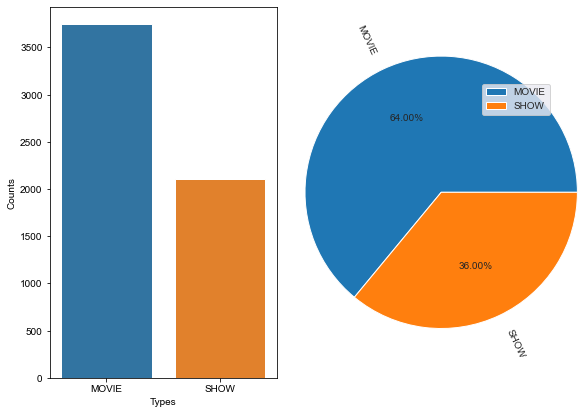

In [13]:
figure_size()
langs= types.type
fig, axes = plt.subplots(1,2, figsize=(8,6))
plt.tight_layout(pad=2)
sns.set_style("darkgrid")
a1=sns.barplot(x = types.type,y = types.counts,ax=axes[0]);
a1.set(xlabel='Types', ylabel='Counts')
plt.pie(types.counts,autopct='%1.2f%%', labels = langs, radius=1.5, labeldistance=1.1 , rotatelabels=True)
plt.legend()
plt.show()

### **Observation**

It has been Observed That Netflix has Movies(64.74) more than Shows(32.26).

# **How are various Age Certifications are distributed in the data?**

<Figure size 1080x720 with 0 Axes>

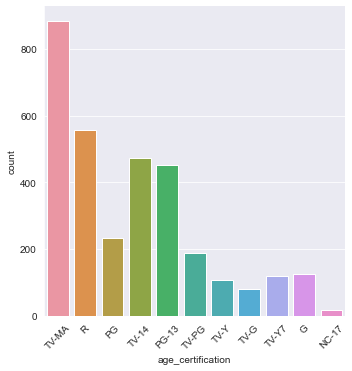

In [14]:
figure_size()
sns.catplot(x='age_certification', kind="count", data=df)
plt.xticks(rotation=45)
plt.show()

### **Observation**
* TV_MA: asigned to be viewed by adults and therefore may be unsuitable for children under 17

# **which Genre is most/least occuring on Netflix?**

<Figure size 1080x720 with 0 Axes>

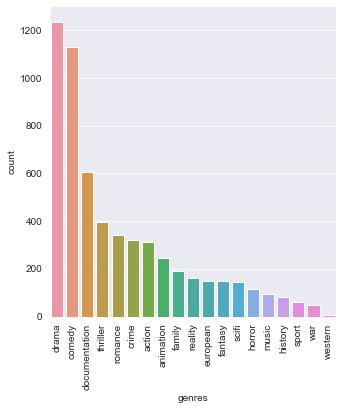

In [15]:
figure_size()
sns.catplot(x='genres', kind="count", data=df, order=df['genres'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### **Observation**
Drama is the most popular and Western is the least popular Genre .

# **Top 10 countries that has produced most Movies/shows on Netflix?**

In [16]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [17]:
countries = df.groupby('production_countries').size().reset_index().sort_values(by = 0,ascending = 0).reset_index().drop('index',axis = 1).rename(columns = {0:'counts'})
countries

,production_countries,counts
0,US,2108
1,IN,603
2,GB,301
3,JP,276
4,KR,225
...,...,...
91,LT,1
92,Lebanon,1
93,MU,1
94,NA,1


In [18]:
countries = df[['production_countries', 'type']].groupby('production_countries').size().sort_values(ascending=False).reset_index()
countries.rename(columns = {0:'counts'}, inplace=True)
countries

,production_countries,counts
0,US,2108
1,IN,603
2,GB,301
3,JP,276
4,KR,225
...,...,...
91,LT,1
92,Lebanon,1
93,MU,1
94,NA,1


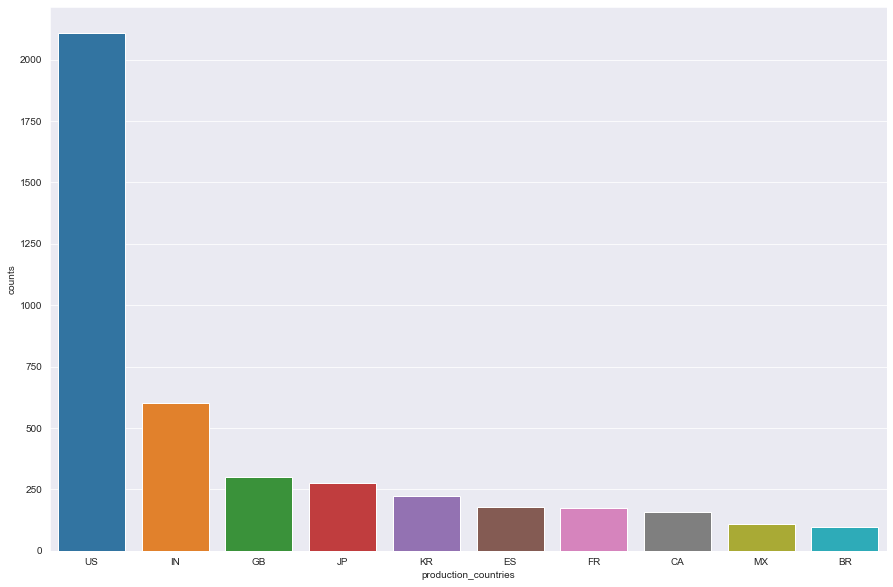

In [19]:
figure_size()
sns.barplot(x = countries.production_countries[:10],y = countries.counts[:10]);
plt.show()

# **Observation**

As we can observe US is the Most Popular Production Countries.

# **Year-wise analysis of Netflix content released**

In [20]:
release_year_count= df.release_year.value_counts().reset_index()
release_year_count.rename(columns = {'index':'release_year','release_year': 'counts' }, inplace=True)
release_year_count = pd.DataFrame(release_year_count)
release_year_count

,release_year,counts
0,2019,836
1,2020,814
2,2021,787
3,2018,773
4,2017,563
...,...,...
58,1960,1
59,1974,1
60,1959,1
61,1978,1


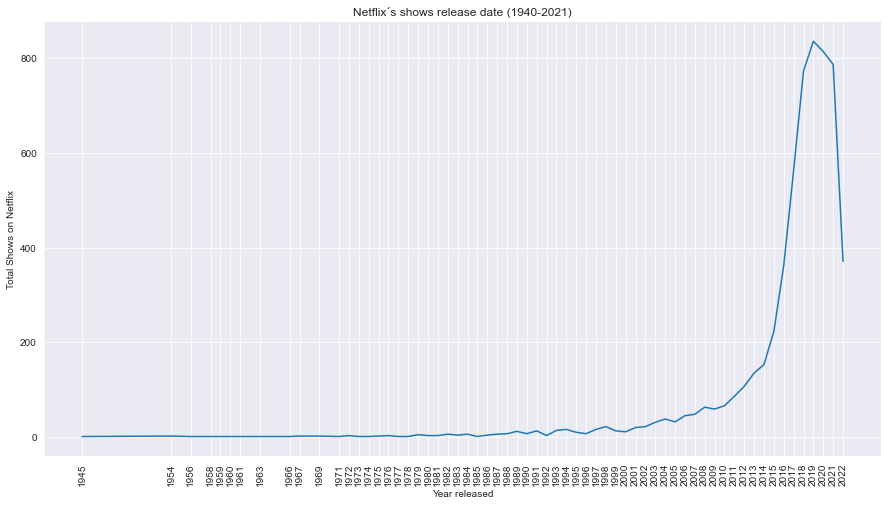

In [21]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='release_year', y='counts', data= release_year_count)
plt.title('Netflix´s shows release date (1940-2021)')
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.xticks(release_year_count['release_year'])
plt.xticks(rotation=90)
plt.show()

### **Observation**

It has been Observed That most of the Movies are released in 2019.

It has been Observed That most of the Movies are released in period of  2010-2019.

# **Bi-Variate Analysis**

# **What is break up of Genre for each Age Certification?**

<AxesSubplot:xlabel='age_certification', ylabel='count'>

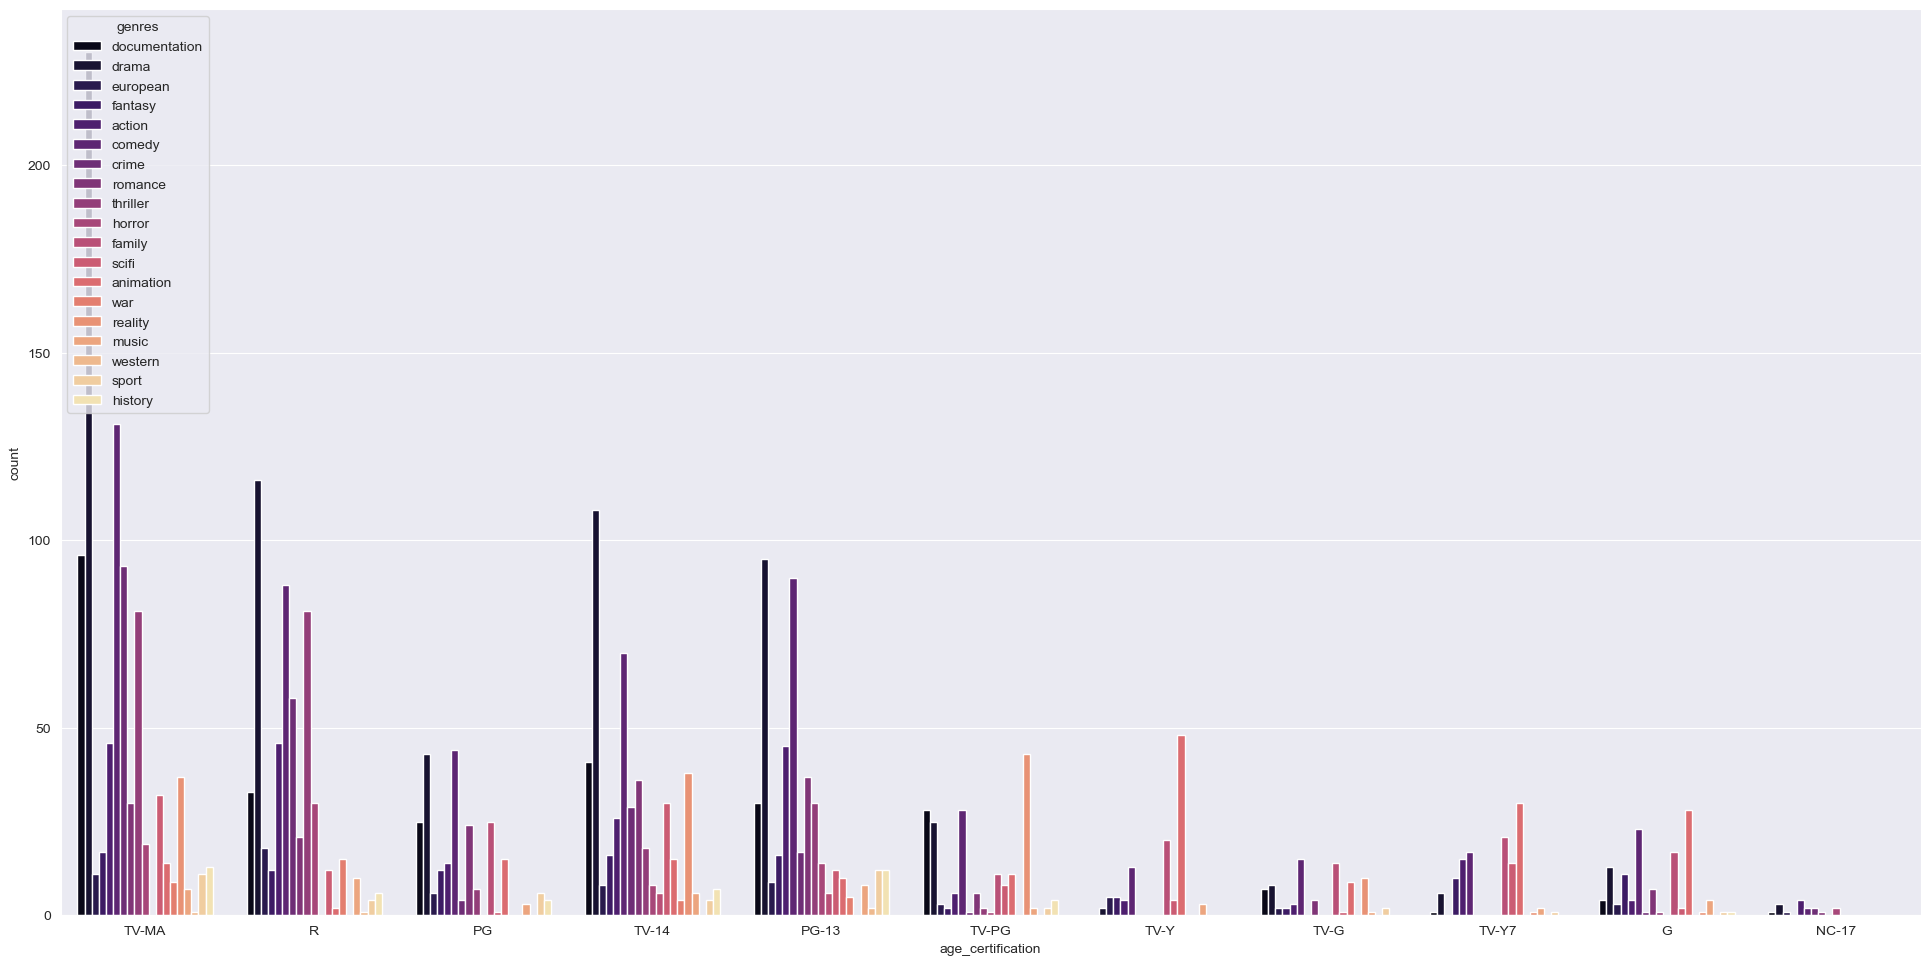

In [22]:
plt.figure(figsize=(24, 12), dpi=100)
sns.countplot(data=df, x="age_certification", hue="genres",palette = 'magma')

# **which genres have the best average IMDB Ratings?**

In [23]:
b = df.groupby('genres')[['imdb_score']].mean().reset_index().sort_values(by='imdb_score')
b.head()

,genres,imdb_score
10,horror,5.971296
16,thriller,6.211559
7,family,6.249718
18,western,6.266667
2,comedy,6.305104


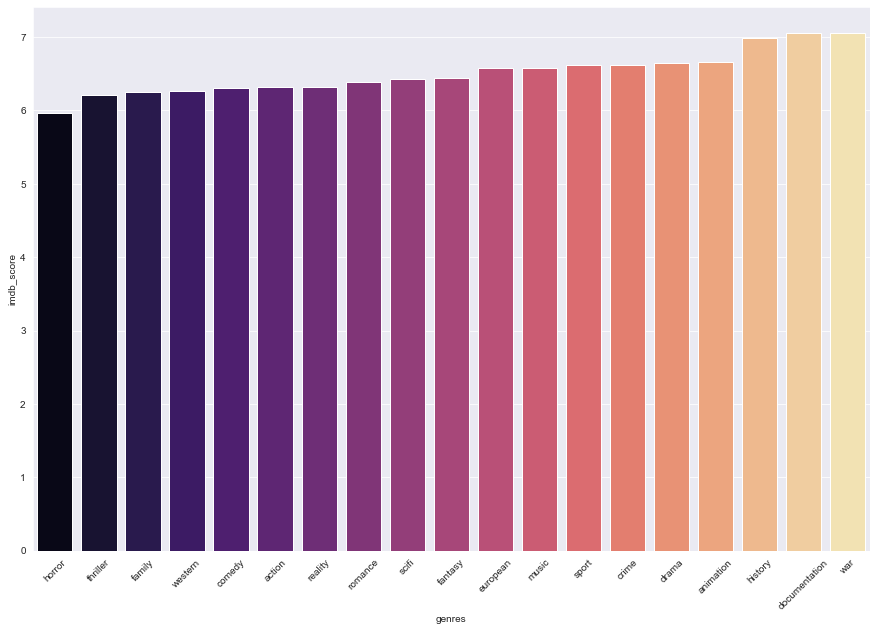

In [24]:
figure_size()
sns.barplot(x='genres', y='imdb_score', data=b,palette = 'magma')
plt.xticks(rotation=45)
plt.show()

# **which genres have the best average TMDB Ratings?**

In [25]:
b = df.groupby('genres')[['tmdb_score']].sum().reset_index().sort_values(by='tmdb_score')
b.head()

,genres,tmdb_score
18,western,37.801
17,war,334.747
15,sport,404.579
9,history,569.991
11,music,591.703


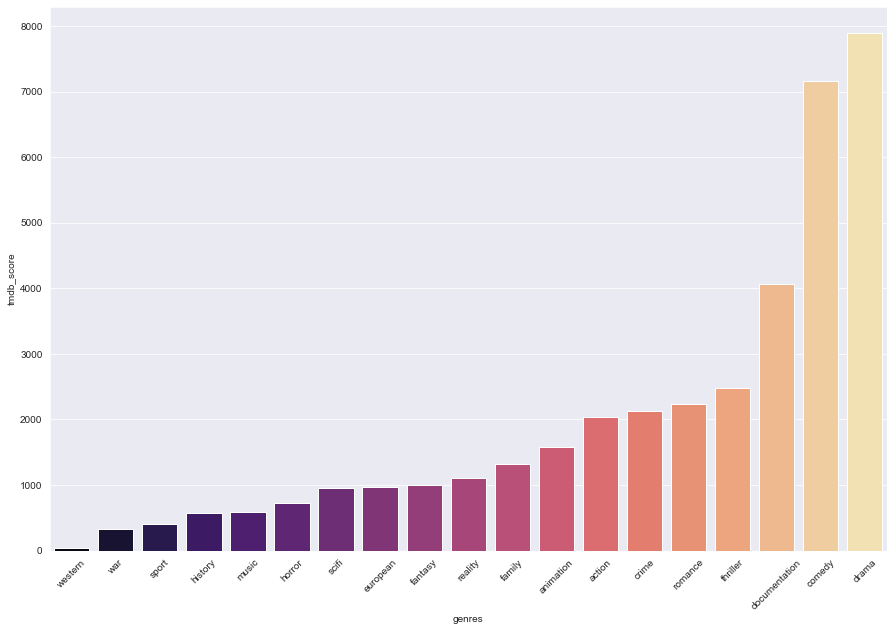

In [26]:
figure_size()
sns.barplot(x='genres', y='tmdb_score', data=b, palette = 'magma')
plt.xticks(rotation=45)
plt.show()

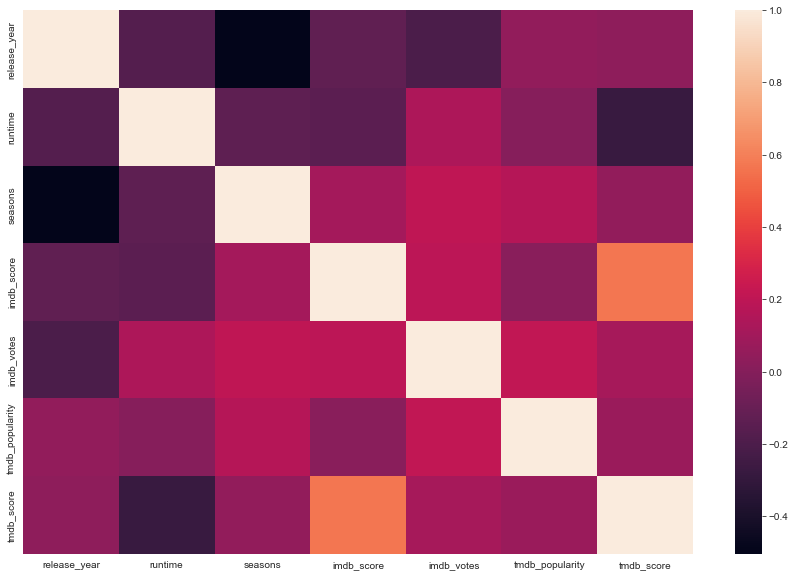

In [27]:
df_num = df[['release_year', 'runtime',   'seasons',  'imdb_score', 'imdb_votes', 'tmdb_popularity',  'tmdb_score']]
figure_size()
sns.heatmap(df_num.corr())
plt.show()